In [1]:
pip install mlxtend


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import kagglehub



/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Load the dataset
data = pd.read_csv("basket_analysis.csv")
# Rename the first column to TransactionID 
data.rename(columns={'Unnamed: 0': 'TransactionID'}, inplace=True) 
# Drop the TransactionID column for visualization 
vis = data.drop('TransactionID', axis=1)

vis

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [4]:
data.isna().sum()

TransactionID    0
Apple            0
Bread            0
Butter           0
Cheese           0
Corn             0
Dill             0
Eggs             0
Ice cream        0
Kidney Beans     0
Milk             0
Nutmeg           0
Onion            0
Sugar            0
Unicorn          0
Yogurt           0
chocolate        0
dtype: int64

In [5]:
# Data exploration
print("First few rows of the dataset:") 
print(data.head()) 
print("\nSummary statistics:") 
print(data.describe()) 
print("\nData types:") 
print(data.dtypes)

First few rows of the dataset:
   TransactionID  Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  \
0              0  False   True   False   False   True   True  False   
1              1  False  False   False   False  False  False  False   
2              2   True  False    True   False  False   True  False   
3              3  False  False    True    True  False   True  False   
4              4   True   True   False   False  False  False  False   

   Ice cream  Kidney Beans   Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  \
0       True         False  False   False  False   True    False    True   
1      False         False   True   False  False  False    False   False   
2       True         False   True   False  False  False    False    True   
3      False         False   True    True   True  False    False   False   
4      False         False  False   False  False  False    False   False   

   chocolate  
0       True  
1      False  
2       True  
3      False  
4      Fal

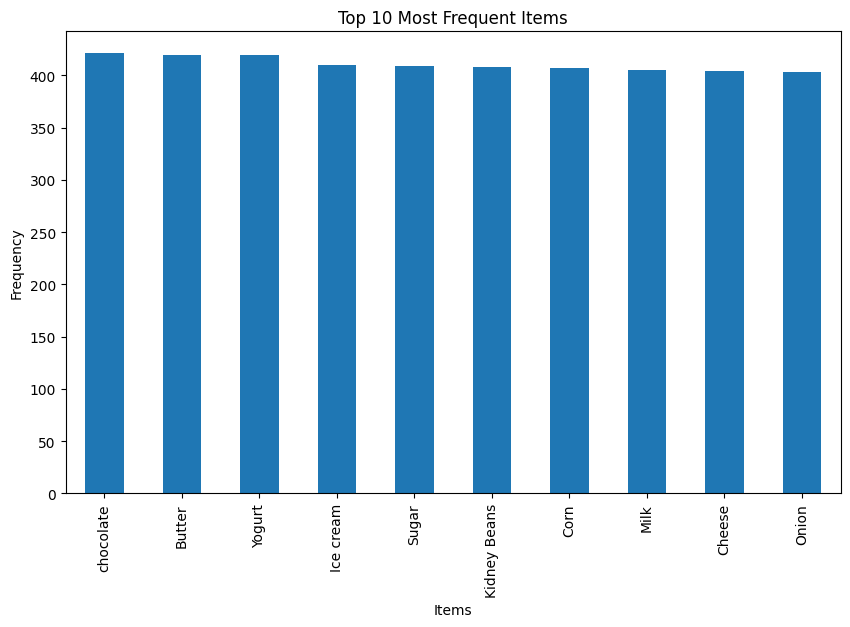

In [6]:
# Visualize the distribution of items 
plt.figure(figsize=(10, 6)) 
vis.sum(axis=0).sort_values(ascending=False).head(10).plot(kind='bar') 
plt.title('Top 10 Most Frequent Items') 
plt.xlabel('Items') 
plt.ylabel('Frequency') 
plt.show()

In [7]:
# Prepare the data for Apriori algorithm
basket_sets = data.set_index('TransactionID')

In [8]:
#Create function to hot encode the values
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#Apply function to data
basket_encoded = basket_sets.applymap(encode_values)

basket_encoded

/tmp/ipykernel_6032/1810457986.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket_sets.applymap(encode_values)


,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
TransactionID,,,,,,,,,,,,,,,,
0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
3,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
995,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0
996,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1


In [9]:
#filter for only invoices with 2 or more items
basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

basket_filtered

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
TransactionID,,,,,,,,,,,,,,,,
0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1
2,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
3,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,1,0,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
995,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0
996,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1


In [10]:
#Generate the frequent itemsets
frequent_itemsets = apriori(basket_filtered, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)

/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
#Apply association rules
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift", ascending=False).reset_index(drop=True)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Unicorn, Apple, Eggs)","(Corn, Sugar)",0.072340,0.198936,0.031915,0.441176,2.217679,0.017524,1.433483,0.591896
1,"(Corn, Sugar)","(Unicorn, Apple, Eggs)",0.198936,0.072340,0.031915,0.160428,2.217679,0.017524,1.104919,0.685436
2,"(Cheese, Unicorn)","(Dill, Kidney Beans, Eggs)",0.180851,0.079787,0.031915,0.176471,2.211765,0.017485,1.117401,0.668831
3,"(Dill, Kidney Beans, Eggs)","(Cheese, Unicorn)",0.079787,0.180851,0.031915,0.400000,2.211765,0.017485,1.365248,0.595376
4,"(Corn, Nutmeg, Milk)","(Bread, Kidney Beans)",0.090426,0.177660,0.035106,0.388235,2.185277,0.019041,1.344210,0.596314
...,...,...,...,...,...,...,...,...,...,...
33243,"(Dill, Unicorn)","(Bread, Sugar)",0.178723,0.190426,0.034043,0.190476,1.000266,0.000009,1.000063,0.000324
33244,"(Butter, Kidney Beans, Ice cream)",(Dill),0.117021,0.418085,0.048936,0.418182,1.000231,0.000011,1.000166,0.000262
33245,(Dill),"(Butter, Kidney Beans, Ice cream)",0.418085,0.117021,0.048936,0.117048,1.000231,0.000011,1.000031,0.000397
33246,"(Dill, Onion)","(Yogurt, Eggs)",0.204255,0.197872,0.040426,0.197917,1.000224,0.000009,1.000055,0.000281


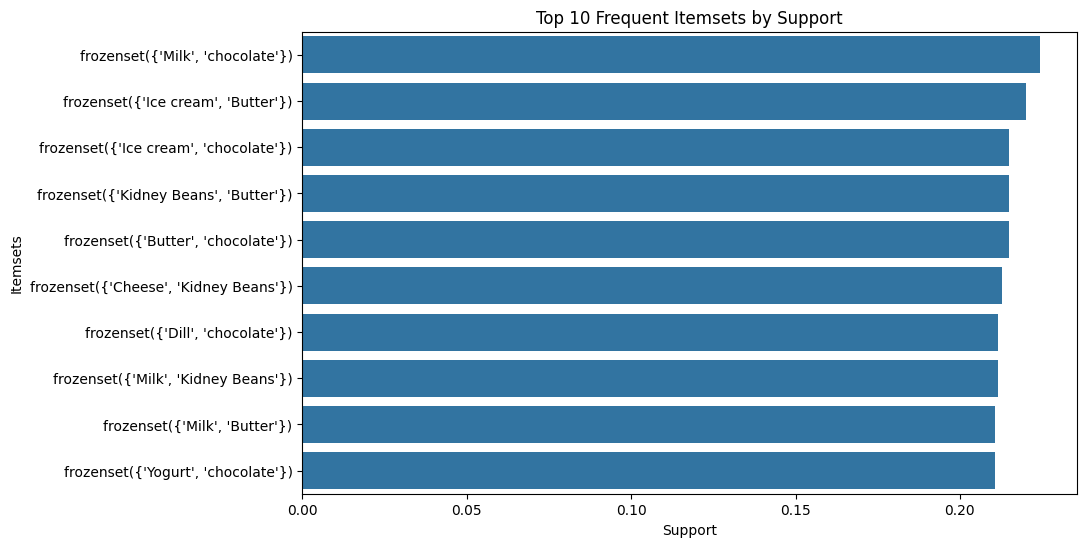

In [29]:
# Create a new variable to filter out itemsets with less than two items
filtered_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]

# Visualize the support of frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=filtered_itemsets.sort_values(by='support', ascending=False).head(10))
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


/tmp/ipykernel_6032/1199582295.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='itemsets', data=top_lift, palette='viridis')


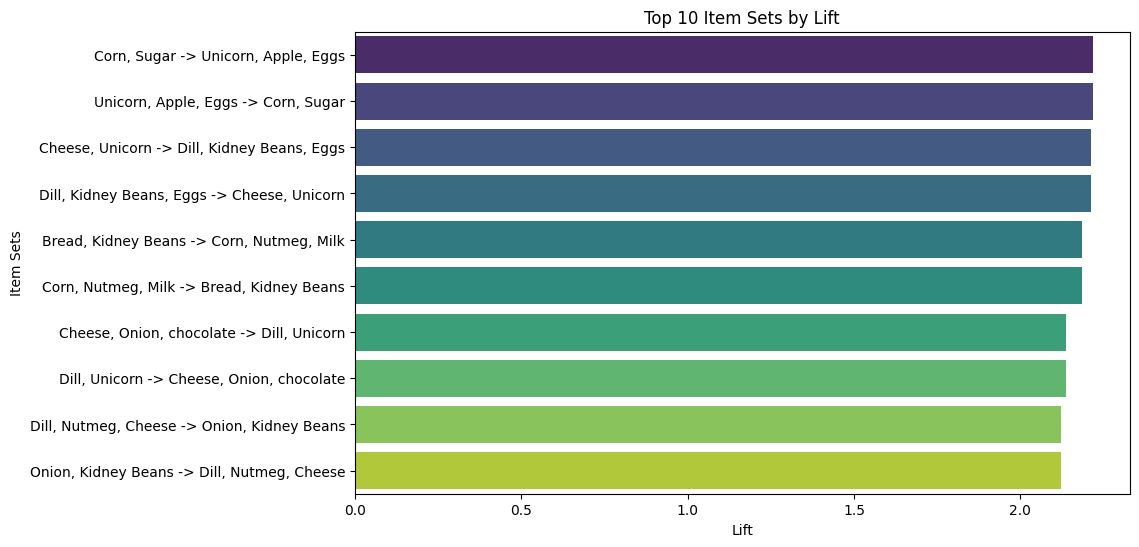

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract association rules with a lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sort rules by lift and get the top 10
top_lift = rules.sort_values(by='lift', ascending=False).head(10)

# Create a new column for combined item sets
top_lift['itemsets'] = top_lift['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + top_lift['consequents'].apply(lambda x: ', '.join(list(x)))

# Visualize the top 10 item sets by lift
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='itemsets', data=top_lift, palette='viridis')
plt.title('Top 10 Item Sets by Lift')
plt.xlabel('Lift')
plt.ylabel('Item Sets')
plt.show()


In [14]:
# Display the top 10 rules by lift, support, and confidence 
print("Top 10 Rules by Lift:") 
print(assoc_rules.sort_values(by='lift', ascending=False).head(10)[['antecedents', 'consequents', 'lift', 'support', 'confidence']]) 
print("\nTop 10 Rules by Support:") 
print(assoc_rules.sort_values(by='support', ascending=False).head(10)[['antecedents', 'consequents', 'lift', 'support', 'confidence']]) 
print("\nTop 10 Rules by Confidence:") 
print(assoc_rules.sort_values(by='confidence', ascending=False).head(10)[['antecedents', 'consequents', 'lift', 'support', 'confidence']])

Top 10 Rules by Lift:
                  antecedents                 consequents      lift   support  \
1               (Corn, Sugar)      (Unicorn, Apple, Eggs)  2.217679  0.031915   
0      (Unicorn, Apple, Eggs)               (Corn, Sugar)  2.217679  0.031915   
2           (Cheese, Unicorn)  (Dill, Kidney Beans, Eggs)  2.211765  0.031915   
3  (Dill, Kidney Beans, Eggs)           (Cheese, Unicorn)  2.211765  0.031915   
4        (Corn, Nutmeg, Milk)       (Bread, Kidney Beans)  2.185277  0.035106   
5       (Bread, Kidney Beans)        (Corn, Nutmeg, Milk)  2.185277  0.035106   
6  (Cheese, Onion, chocolate)             (Dill, Unicorn)  2.137507  0.036170   
7             (Dill, Unicorn)  (Cheese, Onion, chocolate)  2.137507  0.036170   
9      (Dill, Nutmeg, Cheese)       (Onion, Kidney Beans)  2.121751  0.035106   
8       (Onion, Kidney Beans)      (Dill, Nutmeg, Cheese)  2.121751  0.035106   

   confidence  
1    0.160428  
0    0.441176  
2    0.176471  
3    0.400000  
4    0